Imports

In [3]:
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.tools.monitor import job_monitor
import matplotlib.pyplot as plt
import numpy as np

Set IBMQ variable

In [4]:
#IBMQ.save_account('cda129c5cc2b8ad7404afd78a8155a57129a5fd29b3f1eeadfe0da76ab4fda614fe032f82ed42e2ee8452cbe69742b6102e8beded9598ce90e2b1000a3c81538')
IBMQ.load_account()

#print(IBMQ.providers())
provider = IBMQ.get_provider(hub='ibm-q')

print(provider.backends(operational=True))
backend = provider.get_backend('ibmq_vigo')


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>]


Set value of module and its respective angle

In [5]:
mod = 11
theta = 4*np.pi/mod

List every experiment // number of 'a's in the word

In [6]:
a = []
for x in range(0,91):
    n = mod*x
    a.append(n)
    a.append(3+n)

a.sort()
print(a)
print(len(a))


[0, 3, 11, 14, 22, 25, 33, 36, 44, 47, 55, 58, 66, 69, 77, 80, 88, 91, 99, 102, 110, 113, 121, 124, 132, 135, 143, 146, 154, 157, 165, 168, 176, 179, 187, 190, 198, 201, 209, 212, 220, 223, 231, 234, 242, 245, 253, 256, 264, 267, 275, 278, 286, 289, 297, 300, 308, 311, 319, 322, 330, 333, 341, 344, 352, 355, 363, 366, 374, 377, 385, 388, 396, 399, 407, 410, 418, 421, 429, 432, 440, 443, 451, 454, 462, 465, 473, 476, 484, 487, 495, 498, 506, 509, 517, 520, 528, 531, 539, 542, 550, 553, 561, 564, 572, 575, 583, 586, 594, 597, 605, 608, 616, 619, 627, 630, 638, 641, 649, 652, 660, 663, 671, 674, 682, 685, 693, 696, 704, 707, 715, 718, 726, 729, 737, 740, 748, 751, 759, 762, 770, 773, 781, 784, 792, 795, 803, 806, 814, 817, 825, 828, 836, 839, 847, 850, 858, 861, 869, 872, 880, 883, 891, 894, 902, 905, 913, 916, 924, 927, 935, 938, 946, 949, 957, 960, 968, 971, 979, 982, 990, 993]
182


Define same viariable to store all the information and the number of executions on each experiment

In [ ]:
qc = [] 
jobs = []
results = []
counts = []
nshots = 8192

nlines = 0
with open("results.txt","r+") as file:
    while file.readline():
        nlines += 1

In [ ]:
a = a[nlines:]
print(a)
print("faltam ",len(a))

Experiments
===

In [7]:
for i,x in enumerate(a):
    qc.append(QuantumCircuit(1, 1))
    for _ in range(x):
        qc[i].ry(theta,0)
    qc[i].measure(0, 0)
    #print(qc[i].depth())
    #print(qc[i])job = execute(qc, backend, shots=1)
    jobs.append(execute(qc[i], backend, shots=nshots))
    job_monitor(jobs[i])
    results.append(jobs[i].result())
    counts.append(results[i].get_counts(qc[i]))
    txt = str(x)
    for key in counts[i]:
        txt += " " + str(key) + " "+ str(counts[i][key]/nshots*100)
    txt += "\n"
    print(txt)
    with open("results.txt","a+") as file:
        file.write(txt)

NameError: name 'qc' is not defined

Organize data

In [8]:
def make_line(line):
    new_line = ""
    for word in line:
        new_line += word + " "
    return (new_line[:-1] + "\n")

output = ""
with open("results.txt","r") as f:
    line = f.readline()
    while(line):
        line = list(line.split())
        if line[1] == "1":
            output += make_line(line)
        elif line[1] == "0":
            new_line = []
            new_line.append(line[0])
            new_line.extend(line[3:5])
            new_line.extend(line[1:3])
            output += make_line(new_line)
        # pick next line
        line = f.readline()

with open("results.txt","w") as f:
    f.write(output)

Analize dos dados

er max  9.900918211974883  # 520
er min  5.2978515625  # 187
er medio 7.578928049153639
desvio padrão 1.2055175673150897


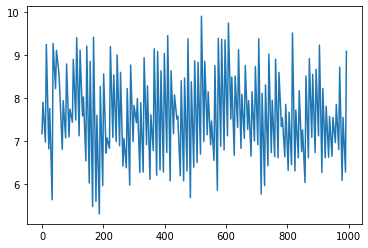

In [9]:
esp = [0, 100-2.025351319275119]
error = []
media = 0

with open("results.txt","r") as f:
    line = f.readline()
    while(line):
        # mod 11 = 0
        line = list(line.split())
        er = abs(float(line[2]) - esp[0])
        error.append(er)
        media += er
        # mod 11 = 3
        line = list(f.readline().split())
        er = abs(float(line[2]) - esp[1])
        media += er
        error.append(er)
        # read next line
        line = f.readline()

media /= len(error)
index_max = np.argmax(error)
print("er max ", error[index_max], " #",a[index_max])
index_min = np.argmin(error)
print("er min ", error[index_min], " #",a[index_min])
print("er medio", media)

dvp = 0
for er in error:
    aux = er - media
    dvp += aux*aux
dvp /= len(error)

print("desvio padrão", dvp)
plt.plot(a, error)
plt.show()

Separa entre erros de congruente a 0 mod 11 e congruente a 3 mod 11

In [10]:
errorPar = []
errorImp = []
valPar = []
valImp = []

for i,val in enumerate(error):
    if i % 2 == 0:
        errorPar.append(val)
        valPar.append(a[i])
    else:
        errorImp.append(val)
        valImp.append(a[i])
print(errorPar)
print(errorImp)

[7.16552734375, 6.97021484375, 6.8115234375, 5.62744140625, 8.21533203125, 8.58154296875, 6.79931640625, 7.06787109375, 7.09228515625, 7.43408203125, 7.48291015625, 7.11669921875, 7.58056640625, 6.53076171875, 6.01806640625, 5.46875, 5.5908203125, 5.2978515625, 5.95703125, 6.7138671875, 6.82373046875, 7.080078125, 6.982421875, 6.884765625, 6.40869140625, 6.3720703125, 5.96923828125, 6.982421875, 7.421875, 6.26220703125, 6.2744140625, 6.9091796875, 6.103515625, 6.77490234375, 6.201171875, 6.3232421875, 6.2744140625, 6.72607421875, 6.06689453125, 7.16552734375, 7.50732421875, 6.18896484375, 6.06689453125, 6.298828125, 5.67626953125, 6.38427734375, 6.494140625, 6.689453125, 6.982421875, 7.14111328125, 6.9091796875, 6.54296875, 5.84716796875, 6.87255859375, 6.787109375, 7.11669921875, 7.50732421875, 6.6650390625, 7.31201171875, 6.82373046875, 7.0556640625, 7.26318359375, 6.640625, 6.99462890625, 6.9091796875, 5.76171875, 5.95703125, 6.4208984375, 6.72607421875, 6.62841796875, 6.60400390625

Analize erro par

media  6.664502489697802
variancia  0.3123444256150856
desvio padrão  0.5588778270920091
erro min  5.2978515625  # 187
erro max  8.58154296875  # 55


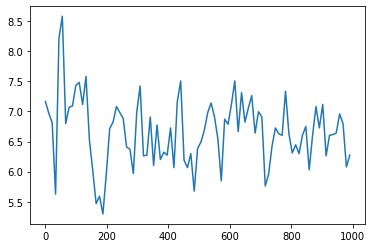

In [11]:
media = 0
for i,er in enumerate(errorPar):
    media += er
media /= len(errorPar)

dvp = 0
for er in errorPar:
    aux = er - media
    dvp += aux*aux
dvp /= len(errorPar)

print("media ", media)
print("variancia ", (dvp))
print("desvio padrão ", np.sqrt(dvp))
index_min = np.argmin(errorPar)
print("erro min ", errorPar[index_min], " #", valPar[index_min])
index_max = np.argmax(errorPar)
print("erro max ", errorPar[index_max], " #", valPar[index_max])
plt.plot(valPar, errorPar)
plt.show()

Analize erro impar

media  8.49335360860949
variancia  0.4263425014428133
desvio padrão  0.6529490802833046
erro min  7.056679930724883  # 267
erro max  9.900918211974883  # 520


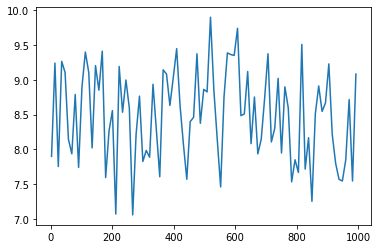

In [12]:
media = 0

for i,er in enumerate(errorImp):
    media += er
media /= len(errorImp)

dvp = 0
for er in errorImp:
    aux = er - media
    dvp += aux*aux
dvp /= len(errorImp)

print("media ", media)
print("variancia ", dvp)
print("desvio padrão ", np.sqrt(dvp))
index_min = np.argmin(errorImp)
print("erro min ", errorImp[index_min], " #", valImp[index_min])
index_max = np.argmax(errorImp)
print("erro max ", errorImp[index_max], " #", valImp[index_max])
plt.plot(valImp, errorImp)
plt.show()

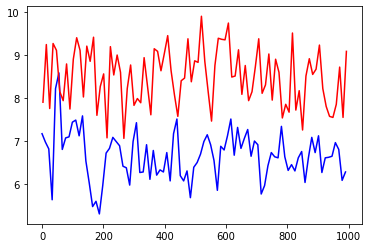

In [13]:
plt.plot(valPar, errorPar, 'b')
plt.plot(valImp, errorImp,'r')
plt.show()

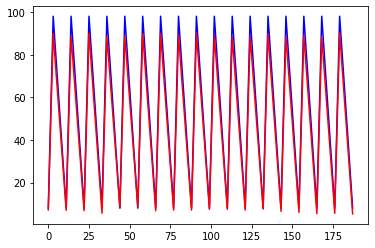

In [54]:
x = [0, 100-2.025351319275119]
real = []
l = 0
with open("real.txt","w") as r:
    with open("results.txt","r") as f:
        line = f.readline()
        while(line):
            l += 1
            # mod 11 = 0
            line = list(line.split())
            er = float(line[2])
            real.append(er)
            r.write(str(er)+"\n")
            line = f.readline()

esp = []
with open("esp.txt","w") as r:
    for i in range(91):
        r.write(str(x[0])+"\n")
        r.write(str(x[1])+"\n")
        esp.append(x[0]*0.92+8)
        esp.append(x[1]*0.92+8)

plt.plot(a[0:35], esp[0:35], 'b')
plt.plot(a[0:35], real[0:35],'r')
plt.show()